## Matplotlib exercises

In [5]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os.path

# to make this notebook's output stable across runs
rnd.seed(4)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."

def save_fig(fig_id, tight_layout=True):
    image_dir = os.path.join(PROJECT_ROOT_DIR, "images")
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)
    path = os.path.join(image_dir, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## Loading the data 

This is Kaggle data on California housing which has been copied to my website to evade updates.

In [6]:
import pandas as pd
HOUSING_PATH = "http://gawron.sdsu.edu/housing.csv"
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = housing_path#os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [7]:
df = load_housing_data()
#  We need no NaNs for what follows.  This is 
#  a big hammer, but put probably ok for what we're doing
df.fillna(0)
print(df.shape)
df

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## The data

Use `scale` from `sklearn.preprocessing`. This will 
center to the mean and scale column by column to unit variance.


**Arguments:**

*X   {array-like, sparse matrix} of shape (n_samples, n_features)*

    The data to center and scale.

*axis  int, default=0*

    axis used to compute the means and standard deviations along. If 0, independently standardize each feature, otherwise (if 1) standardize each sample.

*with_mean   bool, default=True*

    If True, center the data before scaling.

*with_stdbool, default=True*

    If True, scale the data to unit variance (or equivalently, unit standard deviation).

copybool, default=True

    set to False to perform inplace row normalization and avoid a copy (if the input is already a numpy array or a scipy.sparse CSC matrix and if axis is 1).


**Returns**

*X_tr{ndarray, sparse matrix} of shape (n_samples, n_features)*

    The transformed data.


In [81]:
import numpy as np
from sklearn.preprocessing import scale

X,Y = df.median_income.values, df.median_house_value.values
Z = np.vstack([X,Y]).T
print(X.shape,Y.shape,Z.shape,X[0],Y[0],Z[0])
#plt.scatter(X,Y)

(20640,) (20640,) (20640, 2) 8.3252 452600.0 [8.3252e+00 4.5260e+05]


A string formatting trick (consecutive strings)

What would happend if we centered and scaled data.  

May not be useful for every problem.

In [82]:
Z_scale = scale(Z,axis=0)
#print(Z_scale.shape)
print(f" Data Mn:   {Z[:,0].mean():0.3f} {Z[:1].mean():0.3f}"
      f"    Data STD: {Z[:,0].std():0.3f} {Z[:1].std():0.3f}\n"
      f" Scaled Mn: {Z_scale[:,0].mean():0.3f} {Z_scale[:,1].mean():0.3f}"
      f"        Scaled STD: {Z_scale[:,0].std():0.3f} {Z_scale[:1].std():0.3f}\n")

 Data Mn:   3.871 226304.163    Data STD: 1.900 226295.837
 Scaled Mn: 0.000 -0.000        Scaled STD: 1.000 0.108



#### Example:  Plot total_bedrooms versus households.

In [83]:
by_households = df.sort_values(by=['households'])[['total_bedrooms','households']]

<AxesSubplot:xlabel='households'>

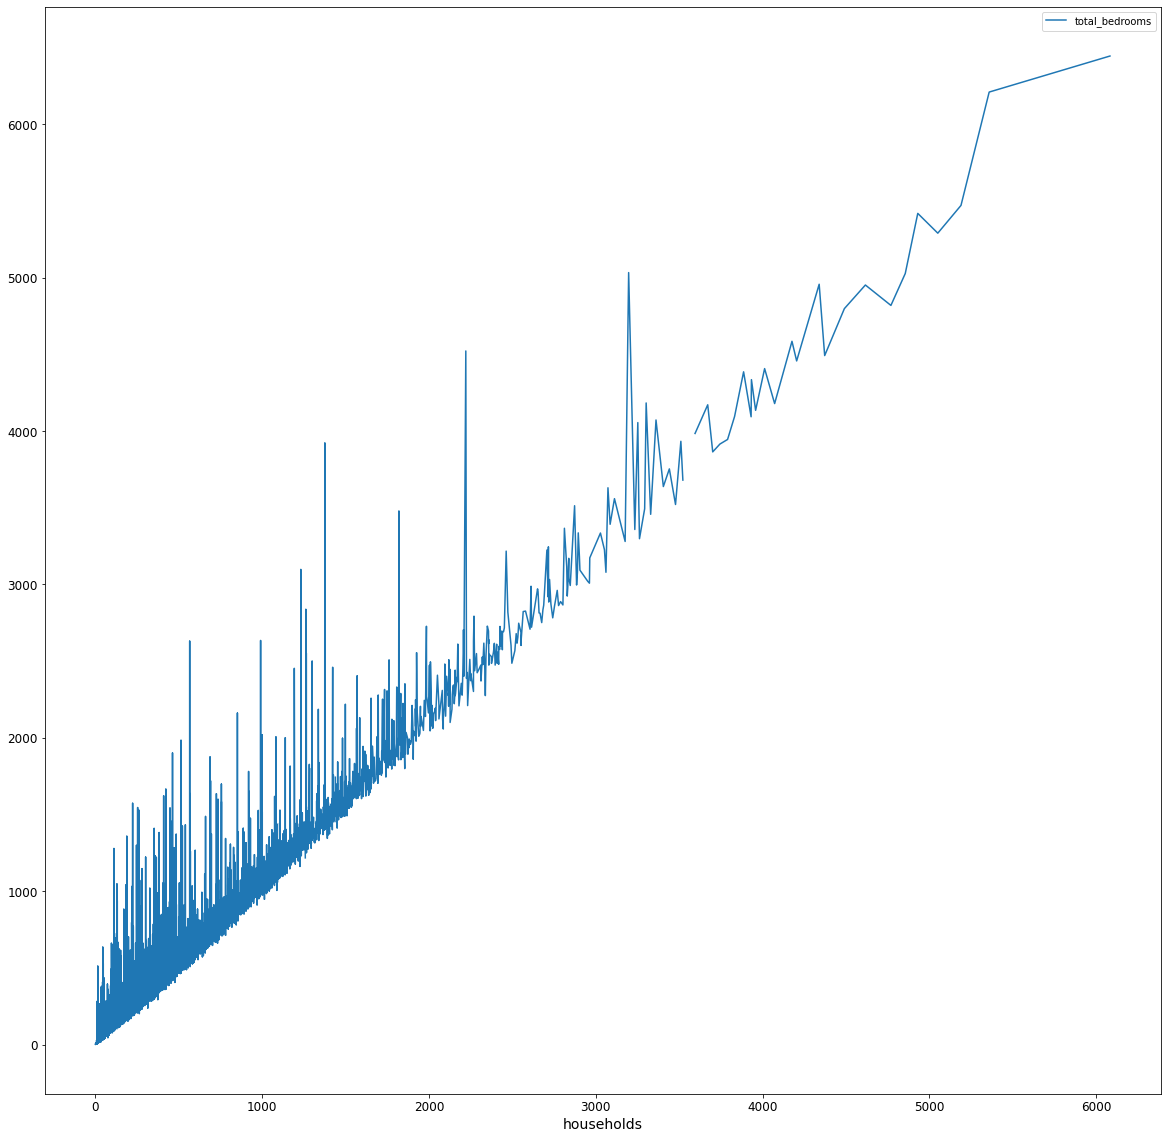

In [84]:
by_households.plot(x='households',y='total_bedrooms',figsize=(20,20))

Not a function.  In other words, in different communities the same humber of households might correspond to very different numbers of total bedrooms.

Let's do some binning: we'll round off to the nearest 50 and take the mean number
of bedrooms for each bin.

In [85]:
import pandas as pd

# Bins: households rounded off to the nearest 50
by_households['Households Level'] = \
         by_households['households'].apply(lambda x: 50 * (x // 50))
bh_pivot = pd.pivot_table(by_households, 
                    values='total_bedrooms',
                    index= 'Households Level',
                    aggfunc=np.mean)
bh_pivot

,total_bedrooms
Households Level,
0.0,46.720365
50.0,97.358314
100.0,161.683043
150.0,199.337266
200.0,245.075658
...,...
4900.0,5419.000000
5050.0,5290.000000
5150.0,5471.000000


We get a plot that tells the story:  Exception  for a few bins in the middle range
of households, the average number of bedrooms in this data set is very close to 1.

Text(0, 0.5, 'Bedrooms')

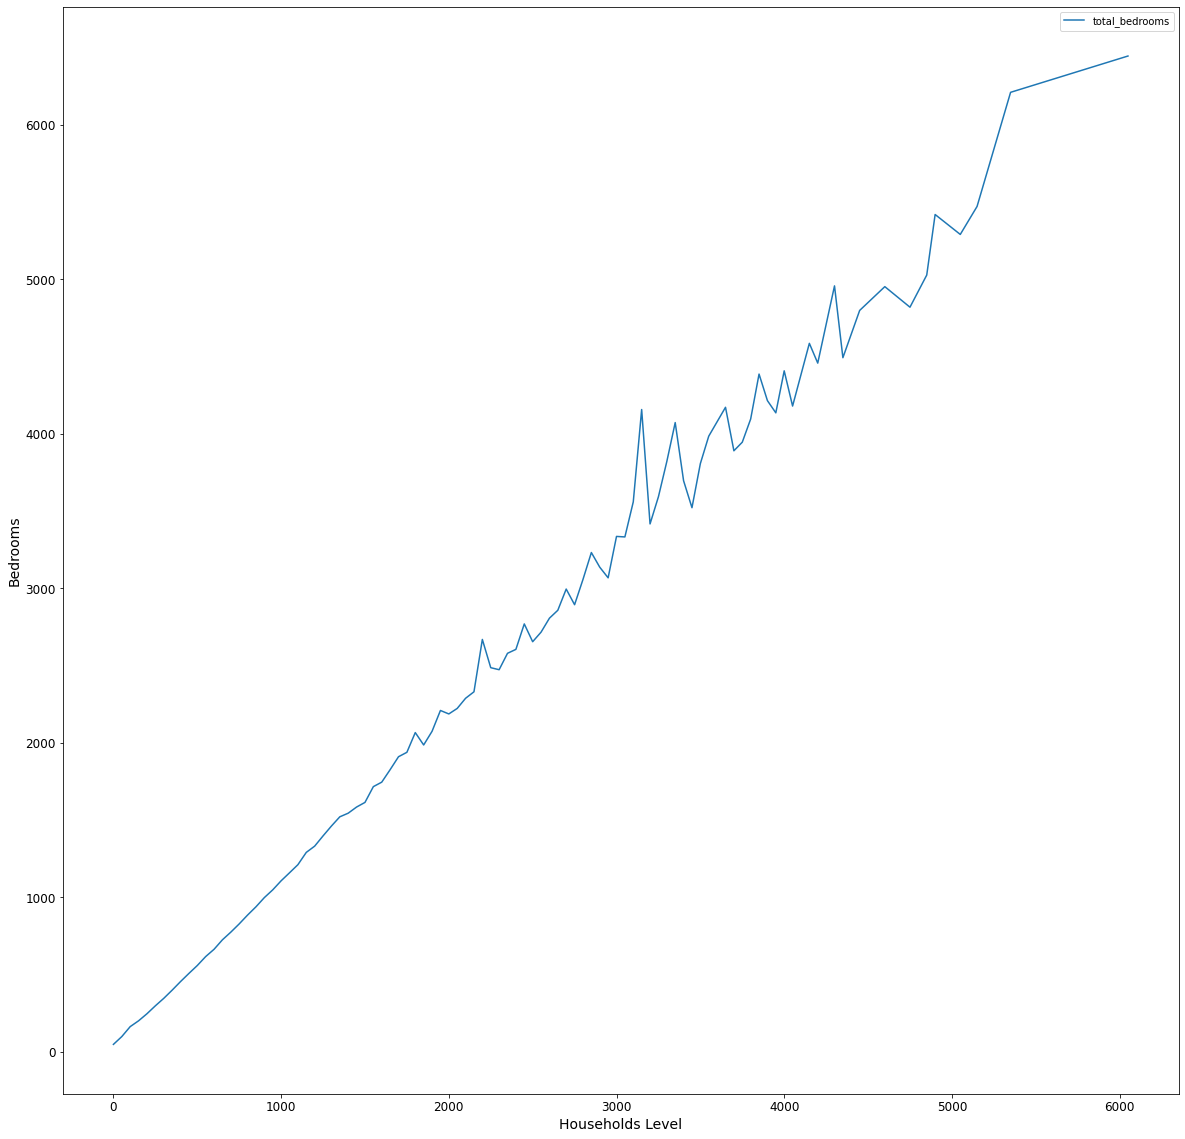

In [86]:
#plt.plot(Z_scale[:,0],Z_scale[:,1])
#bh_pivot.plot(x='households_level',y='index')
fig, ax = plt.subplots(1,1)
bh_pivot.plot(figsize=(20,20),ax=ax)
plt.ylabel('Bedrooms')

## The Problems

### Part A

Plot median house value (y-axis) versus average number of bedrooms (x-axis).

Do this two ways.  First use pandas plot method on a data frame
whose index contains the values you want on the x-axis. Second
using that data frame to supply the values,  plot it
using the pyplot plot function (plt.plot).  Customize your results
with line style and line color.  Add a text annotation at one of
the spikes.

You should start by adding a column for average number of BRs to the original DF.
You may want to try some form of binning of the average number of BRs as was done above.
Note that with a variable that ranges over small values rounding off to
the nearest integer may obscure a lot.

Hence `round(...)`:

In [116]:
# round to precision level 1 (1 decimal point)
round(2.361,1)

2.4

A note on the data before we begin.  This data is either very old or it's been capped or
both.

In [8]:
df['median_house_value'].max()

500001.0

In [118]:
df.dropna(inplace=True)
# Using round(..., 1)
df['avg_BRs'] = round(df['total_bedrooms']/df['households'],1)
df2 = df.sort_values(by=['avg_BRs'])
df3 = df2[['avg_BRs','median_house_value']]


In [119]:
hvbr_pivot = pd.pivot_table(df2, 
                    values='median_house_value',
                    index= 'avg_BRs',
                    aggfunc=np.mean)
hvbr_pivot

,median_house_value
avg_BRs,
0.3,275000.000000
0.4,165000.000000
0.5,240633.500000
0.6,121880.000000
0.7,173436.842105
...,...
11.4,221400.000000
14.1,87500.000000
15.3,67500.000000


We have clear outliers at 25.6 and 34.0, because they represent
a huge jump in the avg_BRs versus the rest of the data. Let's omit them from the plot.

In [120]:
hvbr_pivot2 = hvbr_pivot.iloc[:-2]
hvbr_pivot2

,median_house_value
avg_BRs,
0.3,275000.000000
0.4,165000.000000
0.5,240633.500000
0.6,121880.000000
0.7,173436.842105
...,...
11.0,437500.000000
11.2,77500.000000
11.4,221400.000000


Simplest solution.  

Text(0, 0.5, 'Median House Value')

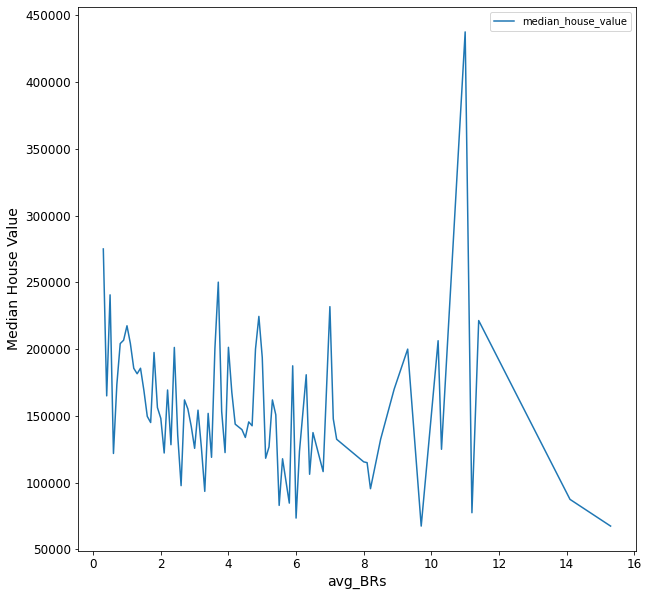

In [121]:

hvbr_pivot2.plot(figsize=(10,10))
# Note we can play with figure properties
plt.ylabel('Median House Value')

What we're seeing is: average number of BRs is not a terribly good predictor of house
value.

#### Second part of Part A

Doing this in matplotlib.  Xvals are the index of our `DataFrame`.

In [46]:
x = hvbr_pivot2.index

<Figure size 432x288 with 0 Axes>

In [21]:
# x is a 1D array of floats
#x

Text(0, 0.5, 'Median House Value')

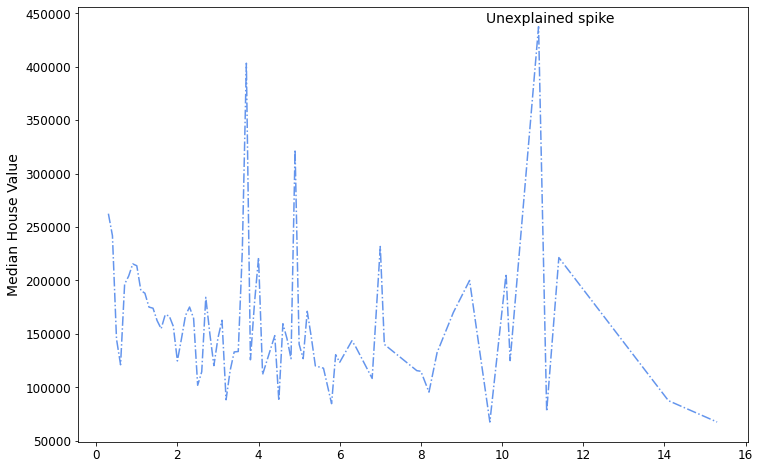

In [42]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
plt.plot(x,hvbr_pivot2['median_house_value'],c='cornflowerblue',linestyle="-.")
t = ax.text(
    11.2, 445_000, "Unexplained spike", ha="center", va="center", size=14)
plt.ylabel('Median House Value')

Choosing colors

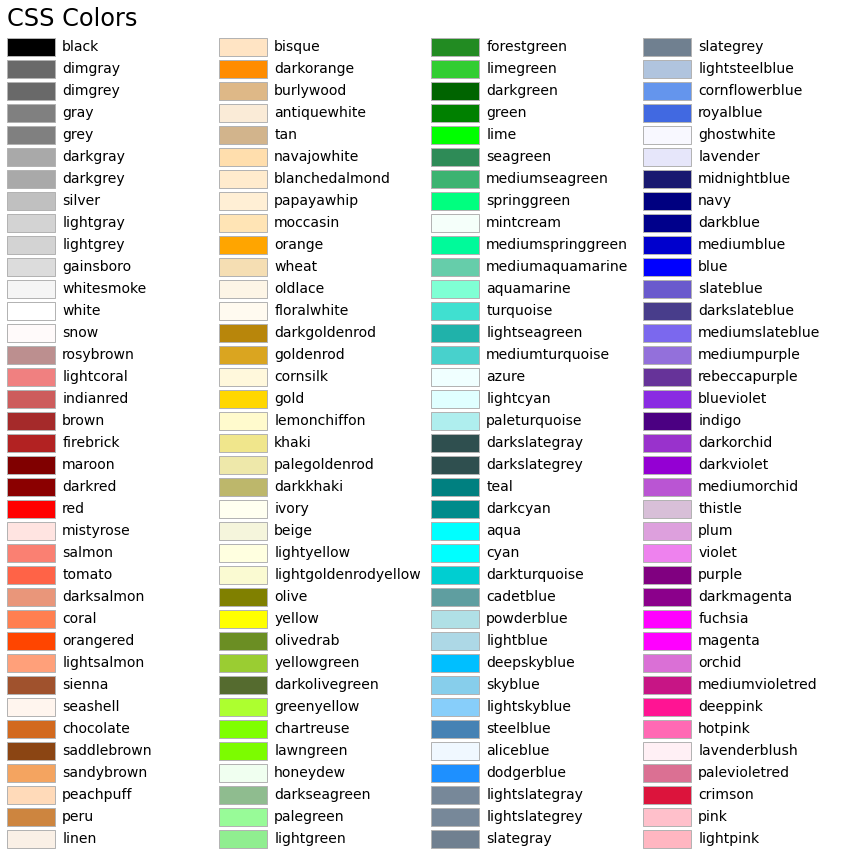

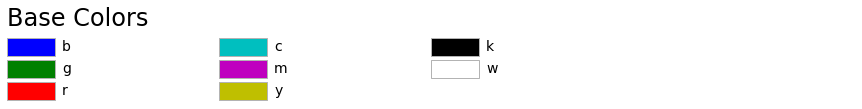

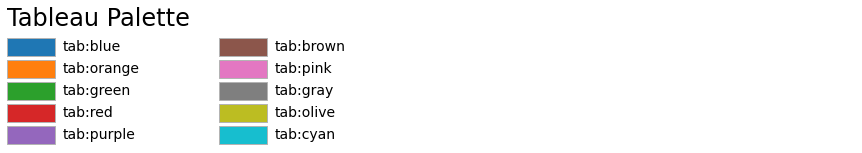

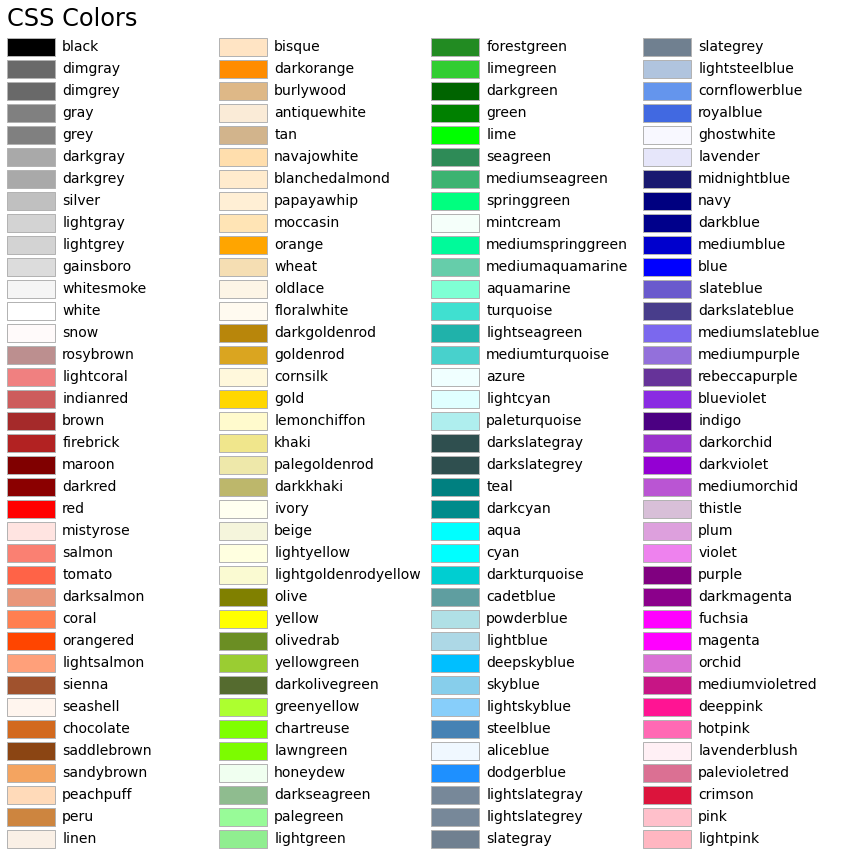

In [61]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
# Provides base colors, tableaux, & css colors
import matplotlib.colors as mcolors


def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
                sort_colors=False, emptycols=2)

plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

This set of colors harmonizes well.

In [57]:
``

OrderedDict([('tab:blue', '#1f77b4'),
             ('tab:orange', '#ff7f0e'),
             ('tab:green', '#2ca02c'),
             ('tab:red', '#d62728'),
             ('tab:purple', '#9467bd'),
             ('tab:brown', '#8c564b'),
             ('tab:pink', '#e377c2'),
             ('tab:gray', '#7f7f7f'),
             ('tab:olive', '#bcbd22'),
             ('tab:cyan', '#17becf')])

In [58]:
mcolors.TABLEAU_COLORS['tab:olive']

'#1f77b4'

Text(0, 0.5, 'Median House Value')

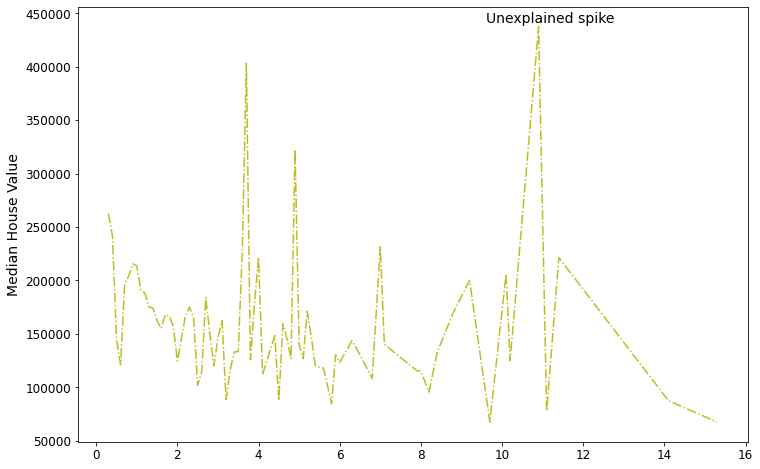

In [93]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
t_olive = mcolors.TABLEAU_COLORS['tab:olive']
plt.plot(x,hvbr_pivot2['median_house_value'],c=t_olive,linestyle="-.")
t = ax.text(
    11.2, 445_000, "Unexplained spike", ha="center", va="center", size=14)
plt.ylabel('Median House Value')

### Part B

Do a linear regression trying to predict median_house_value from median_income.

Separate data into training and test (90/10).

Do a single plot that shows a scatterplot of all the points and the line discovered by regression. This will require finding the model parameters on the trained LinearRegression instance. See the simple_regression NB.

#### Train and test the regression model

In [8]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

lin1 = linear_model.LinearRegression()
Xsample = np.c_[df["median_income"]]
ysample = np.c_[df["median_house_value"]]
# Using random state so I can reproduce this exact split while debugging.
X_train, X_test, y_train, y_test = train_test_split(
    Xsample, ysample, test_size=0.1, random_state=42)
lin1.fit(X_train, y_train)

# For the model points, draw this line. 
# t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
# ax.plot(X_test,t0+(t1*X_test), color = 'r')

# NOTE:  These points will all lie on the regression line defined by t0,t1
y_predicted = lin1.predict(X_test)

#### Find data limits

In [9]:
# Xlimits
xmax,xmin = df["median_income"].max(),df["median_income"].min()
# Ylimits
ymax,ymin = df["median_house_value"].max(),df["median_house_value"].min()

The median income units.

In [115]:
xmin,xmax,ymin,ymax

(0.4999, 15.0001, 14999.0, 500001.0)

#### Draw the plot

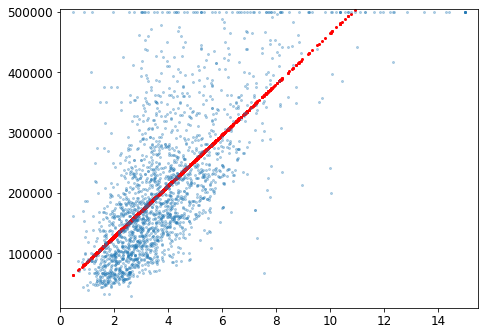

In [11]:
fig, ax = plt.subplots(1,1,figsize=(7.5,5.5))
import matplotlib.colors as mcolors
tblue = mcolors.TABLEAU_COLORS['tab:blue']
tred = mcolors.TABLEAU_COLORS['tab:red']
#df.plot(kind='scatter', x="median_income", y='median_house_value',
#        ax=ax,s=4,alpha=.2)
#ax.scatter(df['median_income'],df['median_house_value'],s=4,alpha=.2)
#ax.scatter(df['median_income'],df['median_house_value'],s=4,alpha=.2)

# Draw predicted y values
ax.scatter(X_test,y_predicted,s=4,color = 'r')
# Alternatively draw the line
# ax.plot(X_test,t0+(t1*X_test), color = 'r')

# Scatterplot the actual test points
ax.scatter(X_test,y_test,s=4,color = tblue,alpha=.3)

## Choose plot boundaries
xdelta,ydelta = .5,5_000
plt.axis([xmin-xdelta, xmax+xdelta, ymin-ydelta, ymax+ydelta])
plt.show()

Explain the set of points clustered at the top of the plot in a straight line.

#### Evaluation

We take the square root to get back to house price like numbers.

In [12]:
import numpy as np
np.sqrt(mean_squared_error(y_test, y_predicted))

85480.03347850905

Worst errors in the data set (pos, neg). 

In [13]:
(y_predicted - y_test).max(),(y_test - y_predicted).max()

(295121.0724180333, 435039.44926516863)

From the [scikit learn docs.](https://scikit-learn.org/stable/modules/model_evaluation.html)

The `r2_score` 
function computes the **coefficient of determination**, usually denoted as R².

It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen s

In [114]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predicted)

0.4521007156901462